In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [31]:
# Starting url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


625

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | hasaki
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | mahebourg
Processing Record 6 of Set 1 | don benito
Processing Record 7 of Set 1 | aitape
Processing Record 8 of Set 1 | scarborough
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | rolim de moura
City not found. Skipping...
Processing Record 11 of Set 1 | ozgon
City not found. Skipping...
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | pacaembu
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Re

Processing Record 37 of Set 4 | udalguri
Processing Record 38 of Set 4 | bereda
Processing Record 39 of Set 4 | kavaratti
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | anloga
Processing Record 42 of Set 4 | evenskjaer
City not found. Skipping...
Processing Record 43 of Set 4 | balkhash
Processing Record 44 of Set 4 | port lavaca
Processing Record 45 of Set 4 | victoria
Processing Record 46 of Set 4 | poum
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | healesville
Processing Record 49 of Set 4 | dudinka
Processing Record 50 of Set 4 | de-kastri
Processing Record 1 of Set 5 | nanzhang
Processing Record 2 of Set 5 | quatre cocos
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | hohhot
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | eichenzell
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | grand river 

Processing Record 31 of Set 8 | kalevala
Processing Record 32 of Set 8 | mersing
Processing Record 33 of Set 8 | saint-pierre
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | veinticinco de mayo
Processing Record 36 of Set 8 | lima
Processing Record 37 of Set 8 | kangaatsiaq
Processing Record 38 of Set 8 | greece
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | tabou
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | tarakan
Processing Record 43 of Set 8 | byron bay
Processing Record 44 of Set 8 | nyurba
Processing Record 45 of Set 8 | darhan
Processing Record 46 of Set 8 | pskov
Processing Record 47 of Set 8 | vila
Processing Record 48 of Set 8 | gilgit
Processing Record 49 of Set 8 | ostrovnoy
Processing Record 50 of Set 8 | ponta delgada
Processing Record 1 of Set 9 | jian
Processing Record 2 of Set 9 | kalispell
Processing Record 3 of Set 9 | hamilton
Processing Record 4 of Set 9 | yerbogachen
Processing Recor

Processing Record 21 of Set 12 | meinung
City not found. Skipping...
Processing Record 22 of Set 12 | mount darwin
Processing Record 23 of Set 12 | ardakan
Processing Record 24 of Set 12 | bauchi
Processing Record 25 of Set 12 | cairns
Processing Record 26 of Set 12 | ribeira do pombal
Processing Record 27 of Set 12 | minab
Processing Record 28 of Set 12 | bayan
Processing Record 29 of Set 12 | khandyga
Processing Record 30 of Set 12 | abu samrah
Processing Record 31 of Set 12 | lao cai
Processing Record 32 of Set 12 | raymond
Processing Record 33 of Set 12 | senneterre
Processing Record 34 of Set 12 | vama buzaului
City not found. Skipping...
Processing Record 35 of Set 12 | slavutych
Processing Record 36 of Set 12 | bowen
Processing Record 37 of Set 12 | wahran
City not found. Skipping...
Processing Record 38 of Set 12 | maragogi
Processing Record 39 of Set 12 | mehamn
Processing Record 40 of Set 12 | bundaberg
Processing Record 41 of Set 12 | wajima
Processing Record 42 of Set 12 | 

In [34]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,-7.82,71,58,10.45,GL,2020-11-08 23:53:53
1,Hasaki,35.73,140.83,55.00,58,75,2.24,JP,2020-11-08 23:54:00
2,Isangel,-19.55,169.27,78.80,83,75,5.82,VU,2020-11-08 23:54:28
3,Carnarvon,-24.87,113.63,71.60,64,90,10.29,AU,2020-11-08 23:54:01
4,Mahebourg,-20.41,57.70,73.40,88,40,5.82,MU,2020-11-08 23:54:07
5,Don Benito,38.96,-5.86,57.00,93,97,1.99,ES,2020-11-08 23:54:56
6,Aitape,-3.14,142.35,86.14,64,53,1.34,PG,2020-11-08 23:54:56
7,Scarborough,54.28,-0.40,51.01,95,82,1.99,GB,2020-11-08 23:54:56
8,Richards Bay,-28.78,32.04,74.08,86,84,14.34,ZA,2020-11-08 23:50:26
9,Georgetown,5.41,100.34,77.00,88,40,3.36,MY,2020-11-08 23:54:57


In [35]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-11-08 23:53:53,77.48,-69.36,-7.82,71,58,10.45
1,Hasaki,JP,2020-11-08 23:54:00,35.73,140.83,55.00,58,75,2.24
2,Isangel,VU,2020-11-08 23:54:28,-19.55,169.27,78.80,83,75,5.82
3,Carnarvon,AU,2020-11-08 23:54:01,-24.87,113.63,71.60,64,90,10.29
4,Mahebourg,MU,2020-11-08 23:54:07,-20.41,57.70,73.40,88,40,5.82
...,...,...,...,...,...,...,...,...,...
577,Leiyang,CN,2020-11-08 23:55:57,26.40,112.86,56.30,64,0,3.09
578,Katobu,ID,2020-11-08 23:55:57,-4.94,122.53,86.52,58,76,1.14
579,Zhigansk,RU,2020-11-08 23:55:58,66.77,123.37,-15.97,89,41,6.53
580,Bunia,CD,2020-11-08 23:55:58,1.57,30.25,60.80,88,52,1.66


In [36]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'11/08/20'

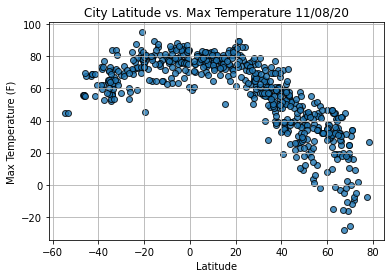

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

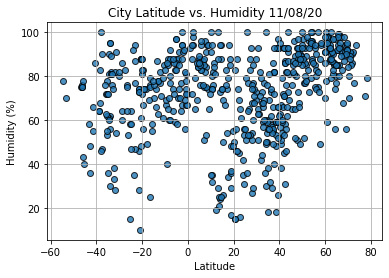

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

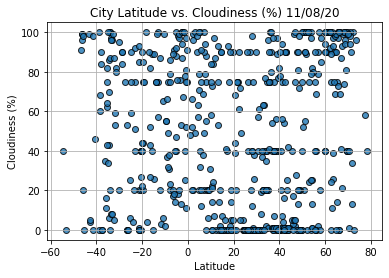

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()